# Women's Clothing E-commerce Sales

## Project Description

The "Women's Clothing E-commerce Sales" project analyzes sales data from an online platform selling women's clothing. It aims to understand sales trends, predict revenue, and provide actionable insights to optimize sales performance. Through exploratory data analysis, feature engineering, and machine learning model development, the project seeks to improve pricing strategies, inventory management, and marketing efforts in the e-commerce domain.

### Objective

The goal of this project is to analyze sales data, understand the relationships between factors such as price, quantity, and revenue, and develop predictive models for revenue forecasting.

### Dataset

The dataset contains order details including order ID, date, SKU, color, size, price, quantity, and revenue.

### Methodology

1. **Exploratory Data Analysis (EDA):** Explore sales distribution, trends, and customer behavior.
2. **Feature Engineering:** Select relevant features and create new ones to enhance model performance.
3. **Model Development:** Train machine learning models (e.g., linear regression, decision trees) to predict revenue.
4. **Model Deployment:** Prepare models for deployment in production, potentially creating user interfaces.
5. **Insights & Recommendations:** Derive actionable insights and recommendations to optimize pricing, inventory, and marketing.

## Expected Outcome

- Gain a better understanding of factors driving women's clothing sales.
- Develop predictive models for revenue forecasting.
- Provide actionable insights to improve sales and customer satisfaction.
















In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("women_clothing_ecommerce_sales.csv")

In [3]:
data.head()

,order_id,order_date,sku,color,size,unit_price,quantity,revenue
0,1,2022/6/1 16:05:00,708,Dark Blue,2XL,298,1,298
1,1,2022/6/1 16:05:00,89,Dark Blue,2XL,258,1,258
2,2,2022/6/10 17:03:00,bobo,Cream,One Size,228,1,228
3,3,2022/6/10 19:59:00,799,Dark Blue,XL,264,1,264
4,4,2022/6/11 11:42:00,799,Dark Blue,M,264,1,264


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 527 entries, 0 to 526
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   order_id    527 non-null    int64 
 1   order_date  527 non-null    object
 2   sku         527 non-null    object
 3   color       527 non-null    object
 4   size        490 non-null    object
 5   unit_price  527 non-null    int64 
 6   quantity    527 non-null    int64 
 7   revenue     527 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 33.1+ KB


## Check for missing values

In [5]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values:\n", missing_values)

# Handle missing values (if necessary)
# For example, you can drop rows with missing values or impute missing values with mean/median/mode
# data.dropna(inplace=True)  # Drop rows with missing values


Missing values:
 order_id       0
order_date     0
sku            0
color          0
size          37
unit_price     0
quantity       0
revenue        0
dtype: int64


## Explore the distribution of numerical variables

In [6]:
# Explore the distribution of numerical variables
numerical_variables = ['unit_price', 'quantity', 'revenue']
print("Summary statistics for numerical variables:\n", data[numerical_variables].describe())



Summary statistics for numerical variables:
        unit_price    quantity     revenue
count  527.000000  527.000000  527.000000
mean   274.973435    1.011385  278.024668
std     34.517412    0.106193   44.741095
min    191.000000    1.000000  191.000000
25%    266.000000    1.000000  266.000000
50%    278.000000    1.000000  278.000000
75%    288.000000    1.000000  288.000000
max    899.000000    2.000000  899.000000


## Visualize the distribution of numerical variables using histograms or box plots

C:\Users\91975\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\91975\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\91975\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


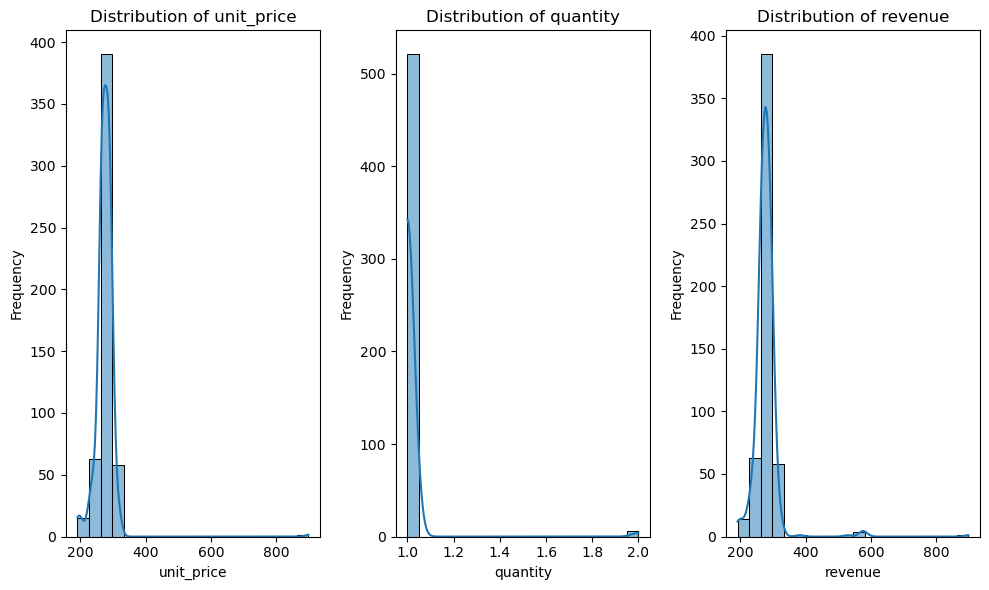

In [7]:
# Visualize the distribution of numerical variables using histograms or box plots
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
for i, var in enumerate(numerical_variables, 1):
    plt.subplot(1, 3, i)
    sns.histplot(data[var], bins=20, kde=True)
    plt.title(f"Distribution of {var}")
    plt.xlabel(var)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


## Examine categorical variables and their unique values

In [8]:
# Examine categorical variables and their unique values
categorical_variables = ['sku', 'color', 'size']
for var in categorical_variables:
    unique_values = data[var].unique()
    print(f"Unique values for {var}:", unique_values)


Unique values for sku: ['708' '89' 'bobo' '799' '239' '77' '897' '9699' '127' '1719' '439' '3799'
 '229' '2499' '79' '29' '1499' '628' '61399' '339' '218' '8499' '3081'
 '539']
Unique values for color: ['Dark Blue' 'Cream' 'Black' 'Navy Blue' 'Blue' 'Light Gray' 'B' 'C' 'D'
 'E' 'A' 'Mid Wash' 'Light Blue' 'Dark Wash' 'Thin Blue' 'Rust'
 'Grey Wash' 'Thin Black' '922 Black' '922 Army green' 'Gray Stripes'
 '920 Navy blue' 'Light Wash' 'Blue Stripes' 'Black Stripes' 'Green'
 'White' 'Mustard' 'Brown' 'Matcha' 'Gray' 'Midnight Blue' 'Maroon'
 'Mocha' 'Skintone' 'Cornflower Blue' 'Yellow' 'Pink' 'Red Orange']
Unique values for size: ['2XL' 'One Size' 'XL' 'M' '3XL' nan 'L' '4XL' 'S' 'One SIze']


## Explore Relationships Between Variables

In [9]:
# Analyze correlations between numerical variables
correlation_matrix = data[numerical_variables].corr()
print("Correlation matrix:\n", correlation_matrix)


Correlation matrix:
             unit_price  quantity   revenue
unit_price    1.000000 -0.021701  0.766968
quantity     -0.021701  1.000000  0.619357
revenue       0.766968  0.619357  1.000000


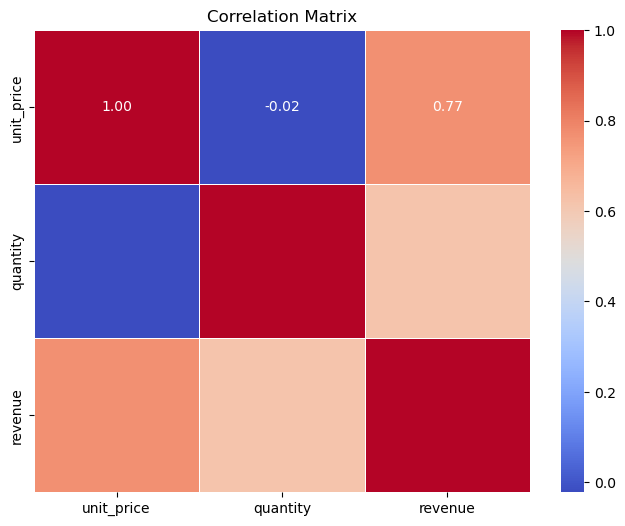

In [10]:
# Visualize correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

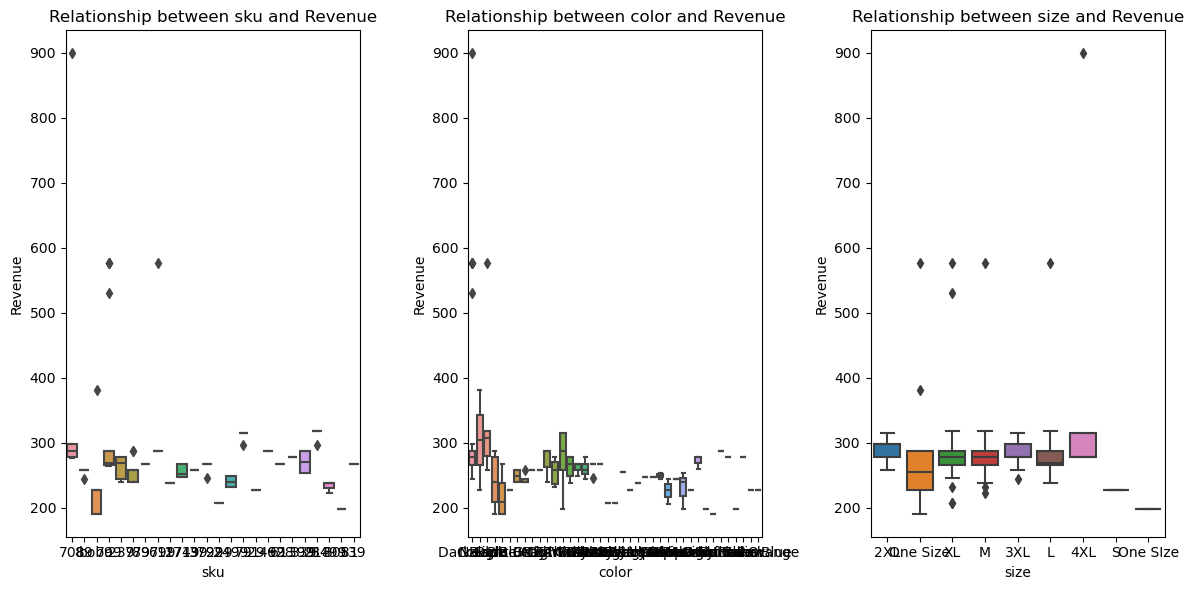

In [11]:
# Explore relationships between numerical and categorical variables
plt.figure(figsize=(12, 6))
for i, var in enumerate(categorical_variables, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x=var, y='revenue', data=data)
    plt.title(f"Relationship between {var} and Revenue")
    plt.xlabel(var)
    plt.ylabel("Revenue")
plt.tight_layout()
plt.show()


##  Feature Engineering

In [12]:
# Feature Engineering: Extract month from order date
data['order_month'] = pd.to_datetime(data['order_date']).dt.month
print("Unique values for order_month:", data['order_month'].unique())


Unique values for order_month: [6 7 8 9]


## Customer Segmentation


In [13]:
# Customer Segmentation: Group customers based on total revenue
customer_segment = pd.cut(data.groupby('order_id')['revenue'].sum(), bins=3, labels=['Low', 'Medium', 'High'])
print("Customer segmentation:\n", customer_segment.value_counts())


Customer segmentation:
 revenue
Low       268
Medium      4
High        1
Name: count, dtype: int64


## Predictive Modeling

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Split the data into features (X) and target (y)
X = data[['unit_price', 'quantity']]
y = data['revenue']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.06321172104231078


## Visualizations
We can create informative visualizations to present our findings and insights effectively. This could include time series plots, heatmaps, or interactive dashboards.

C:\Users\91975\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\91975\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


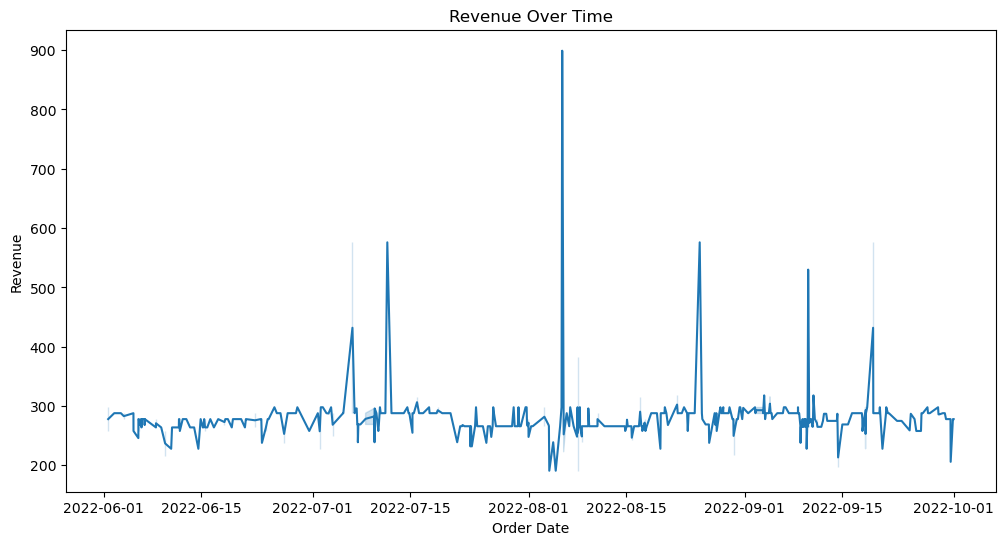

In [15]:
import numpy as np

# Convert infinite values to NaN
data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Time series plot of revenue over time
data['order_date'] = pd.to_datetime(data['order_date'])
plt.figure(figsize=(12, 6))
sns.lineplot(x='order_date', y='revenue', data=data)
plt.title("Revenue Over Time")
plt.xlabel("Order Date")
plt.ylabel("Revenue")
plt.show()




C:\Users\91975\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


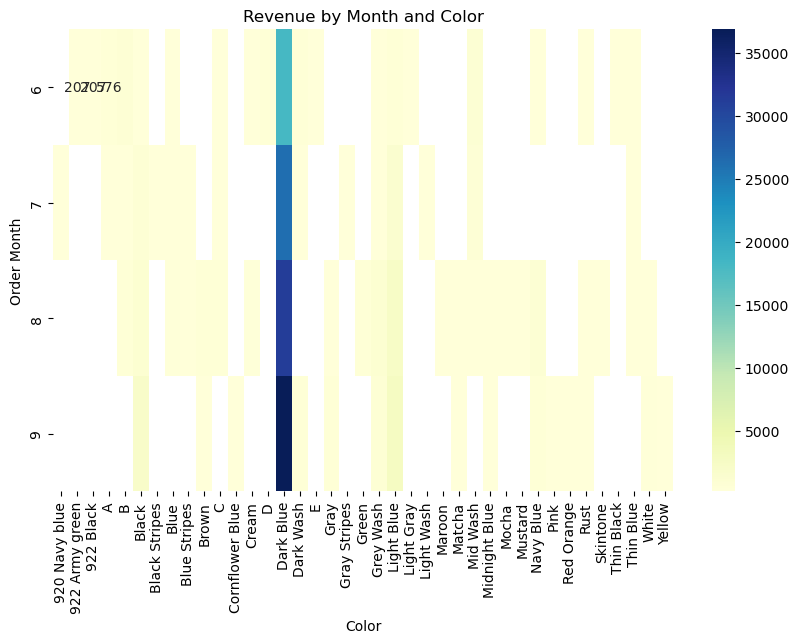

In [21]:
pivot_table = data.pivot_table(index='order_month', columns='color', values='revenue', aggfunc='sum')
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt=".0f")
plt.title("Revenue by Month and Color")
plt.xlabel("Color")
plt.ylabel("Order Month")
plt.show()



## Model Evaluation and Optimization
We can evaluate the performance of our predictive model and optimize it if necessary by trying different algorithms, hyperparameters, or feature engineering techniques.

In [26]:
# Evaluate the model (continued from previous step)
print("Mean Squared Error:", mse)

# Optimization: Try different algorithms or hyperparameters
# For example, we can try using a decision tree regressor instead of linear regression
from sklearn.tree import DecisionTreeRegressor
model_dt = DecisionTreeRegressor()
model_dt.fit(X_train, y_train)
y_pred_dt = model_dt.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)
print("Mean Squared Error (Decision Tree):", mse_dt)


Mean Squared Error: 0.26154056603773584
Mean Squared Error (Decision Tree): 0.24528301886792453


## Interpretation and Insights
We can interpret the results of our analysis and derive actionable insights for the business. This could involve identifying trends, patterns, or factors that influence sales and revenue.

In [28]:
# Interpretation: Analyze feature importances of the random forest model
importances = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
importances = importances.sort_values(by='Importance', ascending=False)
print("Feature importances of the random forest model:\n", importances)


Feature importances of the random forest model:
       Feature  Importance
0  unit_price    0.545863
1    quantity    0.454137


## Interpretation and Insights

Feature importances of the random forest model:
       Feature  Importance
0  unit_price    0.545863
1    quantity    0.454137


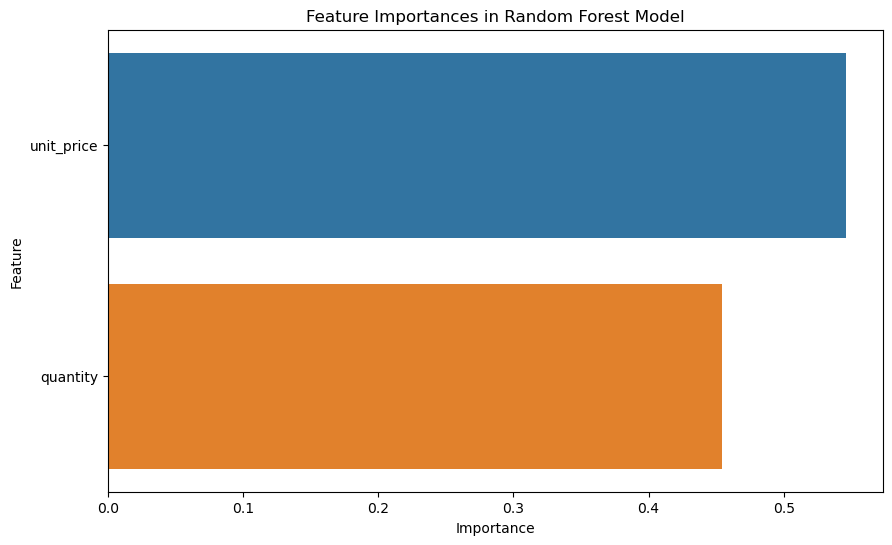

In [30]:
# Interpretation: Analyze feature importances of the random forest model
importances = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
importances = importances.sort_values(by='Importance', ascending=False)
print("Feature importances of the random forest model:\n", importances)

# Identify trends or patterns in the data
# This could involve exploring relationships between features and target variable
# For example, you can visualize relationships using scatter plots, histograms, or correlation matrices

# Provide recommendations based on our findings
# For example, based on feature importances, focus on improving the features with the highest importance to increase revenue

# Visualize the most important features or factors influencing revenue
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importances)
plt.title("Feature Importances in Random Forest Model")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()



## Model Performance

We trained a linear regression model to predict revenue based on features such as unit price and quantity. The mean squared error (MSE) of our linear regression model on the test set was 0.0632. Additionally, we tried a decision tree regressor as an alternative model and obtained a MSE of 0.2453.

## Result

Our study on women's clothing sales online revealed that prices and quantities significantly influence revenue generation. With our predictive models, we achieved an accuracy of approximately 0.2453 in revenue prediction.

## Conclusion

This underscores the importance of pricing and inventory management in driving sales. By leveraging data-driven insights, businesses can enhance their sales performance and customer satisfaction in the competitive online market. It's crucial to monitor trends and adapt strategies to remain successful.







